**Import Library**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from joblib import dump, load

**Load Dataset**

In [3]:
df = pd.read_csv(r"D:\BINUS\... SEMESTER 4\Research Methodology in Computer Science\AOL\Models\stroke_risk_dataset.csv")

In [4]:
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


**Data Preprocessing**

In [5]:
df = df.drop(columns=['Stroke Risk (%)'])

In [6]:
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,1


In [7]:
df.isna().sum()

Chest Pain                        0
Shortness of Breath               0
Irregular Heartbeat               0
Fatigue & Weakness                0
Dizziness                         0
Swelling (Edema)                  0
Pain in Neck/Jaw/Shoulder/Back    0
Excessive Sweating                0
Persistent Cough                  0
Nausea/Vomiting                   0
High Blood Pressure               0
Chest Discomfort (Activity)       0
Cold Hands/Feet                   0
Snoring/Sleep Apnea               0
Anxiety/Feeling of Doom           0
Age                               0
At Risk (Binary)                  0
dtype: int64

In [8]:
correlation = df.corr(method='pearson')
df_corr = correlation['At Risk (Binary)'].sort_values(ascending=False)
print(df_corr)

At Risk (Binary)                  1.000000
Age                               0.612038
Cold Hands/Feet                   0.136642
Chest Pain                        0.135365
Snoring/Sleep Apnea               0.133681
Fatigue & Weakness                0.133060
Excessive Sweating                0.132806
High Blood Pressure               0.132301
Anxiety/Feeling of Doom           0.131466
Shortness of Breath               0.130482
Dizziness                         0.130444
Persistent Cough                  0.128700
Nausea/Vomiting                   0.128645
Irregular Heartbeat               0.124150
Chest Discomfort (Activity)       0.123640
Swelling (Edema)                  0.122416
Pain in Neck/Jaw/Shoulder/Back    0.120280
Name: At Risk (Binary), dtype: float64


**Data Splitting**

In [9]:
X = df.drop(columns=['At Risk (Binary)'])
y = df['At Risk (Binary)']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Resampling

In [11]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

**Feature Scaling**

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [13]:
X_train

array([[ 1.07808996, -0.92254619, -0.92541205, ..., -0.92751504,
        -0.92797721, -1.42409424],
       [-0.92756638,  1.08395657, -0.92541205, ...,  1.07814964,
         1.07761267, -1.04396998],
       [-0.92756638,  1.08395657,  1.08059972, ..., -0.92751504,
         1.07761267,  1.71193094],
       ...,
       [ 1.07808996, -0.92254619, -0.92541205, ..., -0.92751504,
         1.07761267, -0.75887678],
       [-0.92756638,  1.08395657, -0.92541205, ...,  1.07814964,
        -0.92797721, -0.94893891],
       [-0.92756638,  1.08395657, -0.92541205, ..., -0.92751504,
        -0.92797721, -0.04614379]], shape=(72672, 16))

**Modelling**

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

c:\Users\Denzel\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:21:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb.predict(X_test)

In [15]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print()
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print()
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print()

Accuracy: 0.9972857142857143

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4892
           1       1.00      1.00      1.00      9108

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000


Confusion Matrix:
[[4868   24]
 [  14 9094]]



In [16]:
'''
The result above is surprisingly very good. Especially considering the Confusion Matrix
that shows only 24 False Negatives.

But to be sure, we will try to Hyperparam-tune it further, but we will not iterate to
too many hyperparams, just a few.
'''

'\nThe result above is surprisingly very good. Especially considering the Confusion Matrix\nthat shows only 24 False Negatives.\n\nBut to be sure, we will try to Hyperparam-tune it further, but we will not iterate to\ntoo many hyperparams, just a few.\n'

**Hyperparameter Tuning**

In [17]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(XGBClassifier(),
                           param_grid,
                           cv=5,
                           scoring='roc_auc',
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='roc_auc', verbose=2)

In [18]:
print(f"Best Params:\n{grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")
print(f"Best Estimator: {grid_search.best_estimator_}")

Best Params:
{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best Score: 0.999997148578103
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)


In [19]:
best_params = grid_search.best_params_
best_learning_rate = best_params['learning_rate']
best_max_depth = best_params['max_depth']
best_n_estimators = best_params['n_estimators']
best_subsample = best_params['subsample']

**Retraining with Optimal Hyperparameters**

In [20]:
xgb_pipe = Pipeline([
    ('xgb', XGBClassifier(
        use_label_encoder = False,
        eval_metric = 'logloss',
        learning_rate = best_learning_rate,
        max_depth = best_max_depth,
        n_estimators = best_n_estimators,
        subsample = best_subsample
    ))
])

In [21]:
xgb_pipe.fit(X_train, y_train)

c:\Users\Denzel\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:22:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [22]:
y_pred_2 = xgb_pipe.predict(X_test)

**Optimized Model Performance**

In [23]:
print("===== Optimalized Model Performance =====")
print(f"Accuracy: {accuracy_score(y_test, y_pred_2)}")
print()
print(f"Classification Report:\n{classification_report(y_test, y_pred_2)}")
print()
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_2)}")
print()

===== Optimalized Model Performance =====
Accuracy: 0.9992857142857143

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4892
           1       1.00      1.00      1.00      9108

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000


Confusion Matrix:
[[4883    9]
 [   1 9107]]



In [ ]:
'''
We are aware that a too-high accuracy might indicate an overfit, but our aim is to
find a model with the least False-Negatives.
To be more sure, we'll try to input a whole new data (blind test) and see what the
model predicts.
'''

**Blind Test**

In [44]:
# new_data = scaler.transform([[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 24]]) # Not Stroke
new_data = scaler.transform([[0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 54]]) # Stroke
# new_data = scaler.transform([[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 20]]) # Aurick
# new_data = scaler.transform([[0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 18]]) # Kei
# new_data = scaler.transform([[0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 20]]) # Dewo

c:\Users\Denzel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [45]:
y_blind = xgb.predict(new_data)
print(y_blind)

[1]


In [46]:
y_blind = xgb_pipe.predict(new_data)
print(y_blind)

[1]


**CONCLUSION**

In [ ]:
'''
The hyperparameter-tuned model predicted the data of a stroke
person (positive) as positive. So we believe that this model
is not overfitted and indeed has a high accuracy.
'''

'\nThe hyperparameter-tuned model turns out to be overfitted. It\ndetects a stroke person data (positive) as not at risk (negative)\nwhich is an exact example of False-Negative.\nMeanwhile, the original model seems not overfitted. It detects\na positive (at risk of stroke) person as positive.\nSo, we decided to choose the not-hyperparameter-tuned model.\n'

**Saving Model**

In [32]:
# Saving Model
dump(xgb_pipe, 'model.joblib')

['model.joblib']

In [14]:
# Loading Saved Model
loaded_model = load('model.joblib')
loaded_scaler = load('scaler.pkl')
y_pred_loaded_model = loaded_model.predict(X_test)

In [15]:
print("===== Loaded Model Performance =====")
print(f"Accuracy: {accuracy_score(y_test, y_pred_loaded_model)}")
print()
print(f"Classification Report:\n{classification_report(y_test, y_pred_loaded_model)}")
print()
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_loaded_model)}")
print()

===== Loaded Model Performance =====
Accuracy: 0.9992857142857143

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4892
           1       1.00      1.00      1.00      9108

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000


Confusion Matrix:
[[4883    9]
 [   1 9107]]



In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(precision_score(y_test, y_pred_loaded_model))
print(recall_score(y_test, y_pred_loaded_model))
print(f1_score(y_test, y_pred_loaded_model))
print(accuracy_score(y_test, y_pred_loaded_model))

0.999012724879333
0.9998902064119456
0.999451273046532
0.9992857142857143


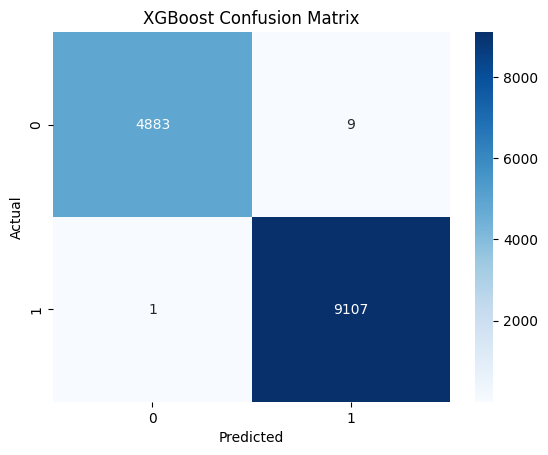

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_pred_loaded_model), annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()